In [1]:
import numpy as np
import pysal as ps
import random as rdm
from pysal.contrib.viz import mapping as maps
%matplotlib inline
from pylab import *

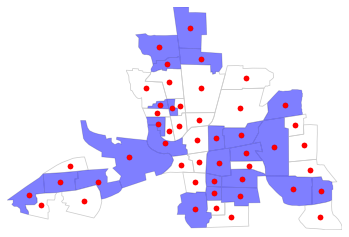

In [3]:
shp_link = ps.examples.get_path('columbus.shp')
shp = ps.open(shp_link)
some = [bool(rdm.getrandbits(1)) for i in ps.open(shp_link)]

fig = figure()

base = maps.map_poly_shp(shp)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')
some = maps.map_poly_shp(shp, which=some)
some.set_alpha(0.5)
some.set_linewidth(0.)
cents = np.array([poly.centroid for poly in ps.open(shp_link)])
pts = scatter(cents[:, 0], cents[:, 1])
pts.set_color('red')

ax = maps.setup_ax([base, some, pts], [shp.bbox, shp.bbox, shp.bbox])
fig.add_axes(ax)
show()

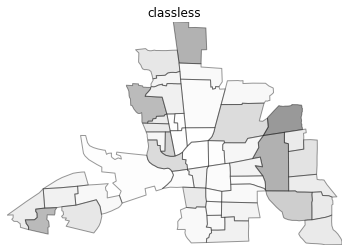

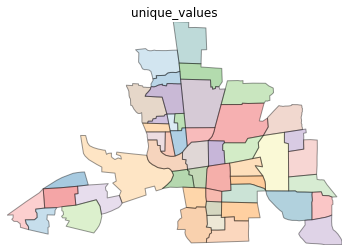

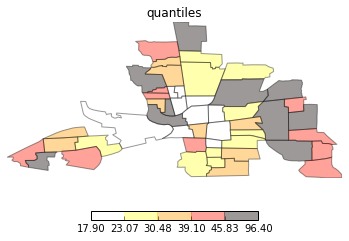

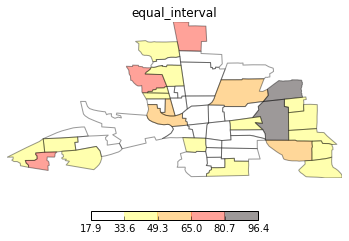

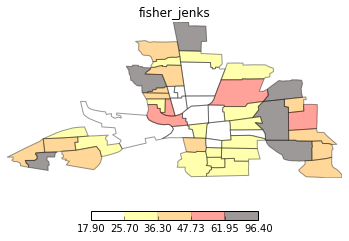

In [4]:
shp_link = ps.examples.get_path('columbus.shp')
values = np.array(ps.open(ps.examples.get_path('columbus.dbf')).by_col('HOVAL'))

types = ['classless', 'unique_values', 'quantiles', 'equal_interval', 'fisher_jenks']
for typ in types:
    maps.plot_choropleth(shp_link, values, typ, title=typ)
